## Práctica 2. Procesamiento de lenguaje natural

### Parte 1. Análisis de sentimientos

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
with open("yelp_labelled.txt","r") as text_file:
    lines_org = text_file.read().split('\n')
len(lines_org)

1001

In [4]:
lines = [line.split("\t") for line in lines_org if len(line.split("\t"))==2 and line.split("\t")[1]!='']
len(lines)

1000

In [5]:
data_line = np.array(lines)
text = data_line[:,0]
target = data_line[:,1]

In [6]:
data = {'Texto':text,'Target':target}


In [7]:
df = pd.DataFrame(data=data)
df.head()

,Texto,Target
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
df['Label'] = df.Target.map({'0':'Mala','1':'Buena'})

In [9]:
df.head()

,Texto,Target,Label
0,Wow... Loved this place.,1,Buena
1,Crust is not good.,0,Mala
2,Not tasty and the texture was just nasty.,0,Mala
3,Stopped by during the late May bank holiday of...,1,Buena
4,The selection on the menu was great and so wer...,1,Buena


In [10]:
df.keys()

Index(['Texto', 'Target', 'Label'], dtype='object')

In [11]:
df['message_len'] = df.Texto.apply(len)
df.head()

,Texto,Target,Label,message_len
0,Wow... Loved this place.,1,Buena,24
1,Crust is not good.,0,Mala,18
2,Not tasty and the texture was just nasty.,0,Mala,41
3,Stopped by during the late May bank holiday of...,1,Buena,87
4,The selection on the menu was great and so wer...,1,Buena,59


Text(0.5, 0, 'Message Length')

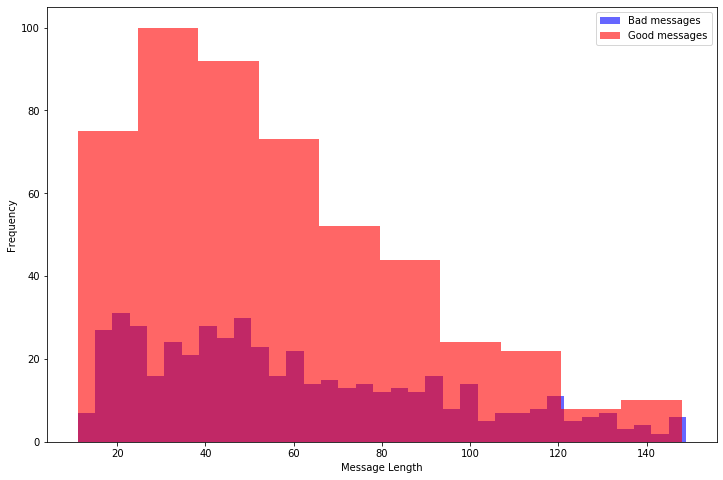

In [12]:
plt.figure(figsize=(12, 8))

df[df.Label=='Mala'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Bad messages', alpha=0.6)
df[df.Label=='Buena'].message_len.plot(kind='hist', color='red', 
                                       label='Good messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [13]:
df[df.Label=='Mala'].describe()

,message_len
count,500.000000
mean,60.752000
std,34.226443
min,11.000000
25%,33.000000
50%,52.500000
75%,84.000000
max,149.000000


In [14]:
df[df.Label=='Buena'].describe()

,message_len
count,500.00000
mean,55.88800
std,30.23249
min,11.00000
25%,32.75000
50%,49.50000
75%,73.25000
max,148.00000


### Apartado a)

#### Configura una partición train-test usando el 75% de los datos para entrenamiento y el 25% restante para test.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Texto'], df['Target'], test_size=0.25, random_state=333)


#### Vamos a estudiar varias representaciones de bolsa de palabras, pero todas ellas utilizarán countVectorizer con el diccionario que se crea a partir de los términos del propio corpus y la lista de palabras vacías (stop_words) que proporciona sklearn para el inglés. Las 4 posibilidades que estudiaremos surgen de combinar los siguientes 2 parámetros:

    - Bolsa de palabras binaria (usando el countVectorizer con el parámetro binary=True y sin usar TfidfTransformer) y bolsa de palabras con TF/IDF (usando primero el countVectorizer con el parámetro binary=False, y sobre el resultado el TfidfTransformer)
    
    - Usando un rango de n-gramas de (1,1) y de (1,2) (parámetro ngram_range del countVectorizer). Es decir, haciendo que la bolsa de palabras se consideren solamente monogramas, o que se consideren monogramas y bigramas


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [17]:
vectorizer_binary = CountVectorizer(stop_words='english',binary=True)
# Tomamos los textos del conjunto de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar
X_train_binary=vectorizer_binary.fit_transform(X_train)


In [18]:
X_test_binary = vectorizer_binary.transform(X_test)
X_test_binary

<250x1473 sparse matrix of type '<class 'numpy.int64'>'
	with 930 stored elements in Compressed Sparse Row format>

In [19]:
X_train_binary.shape

(750, 1473)

In [20]:
print(X_train_binary)

  (0, 517)	1
  (0, 449)	1
  (0, 1075)	1
  (0, 860)	1
  (0, 441)	1
  (1, 711)	1
  (1, 175)	1
  (1, 1413)	1
  (2, 1257)	1
  (2, 507)	1
  (2, 1153)	1
  (2, 86)	1
  (2, 745)	1
  (3, 959)	1
  (3, 1245)	1
  (3, 1272)	1
  (4, 733)	1
  (4, 101)	1
  (4, 588)	1
  (5, 1088)	1
  (5, 616)	1
  (6, 269)	1
  (6, 941)	1
  (6, 1339)	1
  (6, 1227)	1
  :	:
  (744, 108)	1
  (744, 1084)	1
  (744, 120)	1
  (745, 773)	1
  (745, 127)	1
  (745, 1435)	1
  (745, 750)	1
  (745, 1198)	1
  (746, 360)	1
  (747, 901)	1
  (747, 756)	1
  (747, 1001)	1
  (747, 1224)	1
  (747, 857)	1
  (747, 861)	1
  (747, 1150)	1
  (747, 522)	1
  (747, 424)	1
  (747, 745)	1
  (748, 554)	1
  (748, 507)	1
  (748, 1413)	1
  (749, 1121)	1
  (749, 991)	1
  (749, 448)	1


In [21]:
vectorizer_binary.vocabulary_
 

{'excellent': 441,
 'new': 860,
 'restaurant': 1075,
 'experienced': 449,
 'frenchman': 517,
 'wasn': 1413,
 'busy': 175,
 'know': 711,
 'little': 745,
 'bad': 86,
 'service': 1153,
 'food': 507,
 'sucks': 1257,
 'sushi': 1272,
 'strip': 1245,
 'place': 959,
 'gyro': 588,
 'basically': 101,
 'lettuce': 733,
 'hello': 616,
 'right': 1088,
 'steaks': 1227,
 'trimmed': 1339,
 'perfectly': 941,
 'cooked': 269,
 'atmosphere': 65,
 'fun': 530,
 'good': 554,
 'order': 885,
 'vegetarian': 1379,
 'menu': 814,
 'dinner': 356,
 'wide': 1433,
 'array': 56,
 'options': 884,
 'choose': 220,
 'recently': 1048,
 'tried': 1338,
 'caballero': 179,
 'week': 1425,
 'waitress': 1402,
 'thing': 1303,
 'crazy': 294,
 'guacamole': 584,
 'don': 378,
 'like': 738,
 'purã': 1016,
 'ed': 411,
 'highlights': 623,
 'great': 568,
 'quality': 1020,
 'nigiri': 864,
 'buffet': 166,
 'small': 1179,
 'offered': 872,
 'bland': 133,
 'better': 121,
 'ayce': 80,
 'went': 1429,
 'vegas': 1377,
 'probably': 999,
 'hurry': 653

In [22]:
feature_names = vectorizer_binary.get_feature_names()

print(len(feature_names))
print(feature_names)
#print(train_vector_data[10])

1473
['00', '10', '100', '12', '15', '17', '1979', '20', '2007', '23', '30', '35', '40', '40min', '45', '4ths', '5lb', '85', '90', 'absolutely', 'absolutley', 'accomodate', 'accordingly', 'accountant', 'ache', 'acknowledged', 'actual', 'actually', 'added', 'afternoon', 'ago', 'airline', 'albondigas', 'allergy', 'almonds', 'amazing', 'ambiance', 'ambience', 'andddd', 'annoying', 'anymore', 'anytime', 'anyways', 'apologize', 'apology', 'app', 'appalling', 'appealing', 'appetite', 'appetizer', 'appetizers', 'apple', 'approval', 'area', 'arepas', 'aria', 'array', 'arrived', 'arriving', 'article', 'ask', 'asked', 'asking', 'assure', 'ate', 'atmosphere', 'atrocious', 'attached', 'attentive', 'attitudes', 'auju', 'authentic', 'average', 'avoid', 'avoided', 'away', 'awesome', 'awful', 'awkward', 'awkwardly', 'ayce', 'az', 'baba', 'baby', 'bachi', 'bacon', 'bad', 'bagels', 'bakery', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'barely', 'bargain', 'bartender', 'bartenders', 'baseball',

In [23]:
vectorizer_tfidf = CountVectorizer(stop_words='english',binary=False)
X_train_tfidf=vectorizer_tfidf.fit_transform(X_train)

In [24]:
X_test_tfidf=vectorizer_tfidf.transform(X_test)

In [25]:
vectorizer_tfidf.vocabulary_

{'excellent': 441,
 'new': 860,
 'restaurant': 1075,
 'experienced': 449,
 'frenchman': 517,
 'wasn': 1413,
 'busy': 175,
 'know': 711,
 'little': 745,
 'bad': 86,
 'service': 1153,
 'food': 507,
 'sucks': 1257,
 'sushi': 1272,
 'strip': 1245,
 'place': 959,
 'gyro': 588,
 'basically': 101,
 'lettuce': 733,
 'hello': 616,
 'right': 1088,
 'steaks': 1227,
 'trimmed': 1339,
 'perfectly': 941,
 'cooked': 269,
 'atmosphere': 65,
 'fun': 530,
 'good': 554,
 'order': 885,
 'vegetarian': 1379,
 'menu': 814,
 'dinner': 356,
 'wide': 1433,
 'array': 56,
 'options': 884,
 'choose': 220,
 'recently': 1048,
 'tried': 1338,
 'caballero': 179,
 'week': 1425,
 'waitress': 1402,
 'thing': 1303,
 'crazy': 294,
 'guacamole': 584,
 'don': 378,
 'like': 738,
 'purã': 1016,
 'ed': 411,
 'highlights': 623,
 'great': 568,
 'quality': 1020,
 'nigiri': 864,
 'buffet': 166,
 'small': 1179,
 'offered': 872,
 'bland': 133,
 'better': 121,
 'ayce': 80,
 'went': 1429,
 'vegas': 1377,
 'probably': 999,
 'hurry': 653

In [26]:
feature_names_tfidf = vectorizer_tfidf.get_feature_names()

print(len(feature_names_tfidf))
print(feature_names_tfidf)
#print(train_vector_data[10])

1473
['00', '10', '100', '12', '15', '17', '1979', '20', '2007', '23', '30', '35', '40', '40min', '45', '4ths', '5lb', '85', '90', 'absolutely', 'absolutley', 'accomodate', 'accordingly', 'accountant', 'ache', 'acknowledged', 'actual', 'actually', 'added', 'afternoon', 'ago', 'airline', 'albondigas', 'allergy', 'almonds', 'amazing', 'ambiance', 'ambience', 'andddd', 'annoying', 'anymore', 'anytime', 'anyways', 'apologize', 'apology', 'app', 'appalling', 'appealing', 'appetite', 'appetizer', 'appetizers', 'apple', 'approval', 'area', 'arepas', 'aria', 'array', 'arrived', 'arriving', 'article', 'ask', 'asked', 'asking', 'assure', 'ate', 'atmosphere', 'atrocious', 'attached', 'attentive', 'attitudes', 'auju', 'authentic', 'average', 'avoid', 'avoided', 'away', 'awesome', 'awful', 'awkward', 'awkwardly', 'ayce', 'az', 'baba', 'baby', 'bachi', 'bacon', 'bad', 'bagels', 'bakery', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'barely', 'bargain', 'bartender', 'bartenders', 'baseball',

In [27]:
# Calculamos el valor TF-IDF 
tfidfer = TfidfTransformer()
train_tfidf_preprocessed = tfidfer.fit_transform(X_train_tfidf)
test_tfidf_preprocessed = tfidfer.fit_transform(X_test_tfidf)

In [28]:
vectorizer_ngrams11 = CountVectorizer(stop_words='english',ngram_range=(1,1))
X_train_ngrams11=vectorizer_ngrams11.fit_transform(X_train)

In [29]:
X_test_ngrams11 = vectorizer_ngrams11.fit_transform(X_test)

In [30]:
# Calculamos el valor TF-IDF 
train_ngrams11_preprocessed = tfidfer.fit_transform(X_train_ngrams11)
test_ngrams11_preprocessed = tfidfer.fit_transform(X_test_ngrams11)

In [31]:
feature_names_ngrams11 = vectorizer_ngrams11.get_feature_names()

print(len(feature_names_ngrams11))
print(feature_names_ngrams11)
#print(train_vector_data[10])

768
['10', '11', '12', '30', '30s', '35', '40', '70', '99', 'absolute', 'absolutely', 'accident', 'accommodations', 'affordable', 'ahead', 'airport', 'ala', 'amazing', 'ambiance', 'ample', 'angry', 'anticipated', 'anytime', 'apart', 'apparently', 'area', 'aren', 'arrived', 'arrives', 'ask', 'ate', 'atmosphere', 'attack', 'attention', 'attentive', 'authentic', 'avocado', 'away', 'awesome', 'awful', 'bacon', 'bad', 'bagels', 'bakery', 'bar', 'bare', 'barely', 'bars', 'batch', 'bathroom', 'batter', 'bay', 'beans', 'beautiful', 'beautifully', 'believe', 'bellagio', 'best', 'better', 'bigger', 'bird', 'bisque', 'bit', 'bitches', 'bits', 'blame', 'bland', 'blanket', 'bloody', 'blue', 'bodes', 'book', 'bother', 'bowl', 'box', 'boy', 'boyfriend', 'bread', 'break', 'breakfast', 'brick', 'bring', 'brother', 'brought', 'brownish', 'bucks', 'buffet', 'buffets', 'bug', 'bunch', 'burger', 'burgers', 'bus', 'business', 'bussell', 'butter', 'caesar', 'cafe', 'callings', 'came', 'camelback', 'cape', 'c

In [32]:
vectorizer_ngrams12 = CountVectorizer(stop_words='english',ngram_range=(1,2))
X_train_ngrams12 = vectorizer_ngrams12.fit_transform(X_train)

In [33]:
X_test_ngrams12 = vectorizer_ngrams12.fit_transform(X_test)

In [34]:
# Calculamos el valor TF-IDF 
train_ngrams12_preprocessed = tfidfer.fit_transform(X_train_ngrams12)
test_ngrams12_preprocessed = tfidfer.fit_transform(X_test_ngrams12)

In [35]:
feature_names_ngrams12 = vectorizer_ngrams12.get_feature_names()

print(len(feature_names_ngrams12))
print(feature_names_ngrams12)
#print(train_vector_data[10])

1831
['10', '10 minutes', '11', '11 99', '12', '30', '30 minutes', '30s', '35', '35 minutes', '40', '40 bucks', '40 handled', '70', '70 claimed', '99', '99 sandwich', 'absolute', 'absolute visit', 'absolutely', 'absolutely flat', 'absolutely flavor', 'accident', 'accident happier', 'accommodations', 'accommodations vegetarian', 'affordable', 'affordable prices', 'ahead', 'ahead time', 'airport', 'airport experience', 'ala', 'ala cart', 'amazing', 'amazing accommodations', 'amazing doughy', 'amazing quickly', 'ambiance', 'ambiance clean', 'ample', 'ample portions', 'angry', 'angry want', 'anticipated', 'anytime', 'anytime soon', 'apart', 'apart picture', 'apparently', 'apparently heard', 'area', 'area great', 'area nice', 'aren', 'aren good', 'aren ones', 'arrived', 'arrived gyros', 'arrives', 'arrives meh', 'ask', 'ask combo', 'ate', 'ate day', 'atmosphere', 'atmosphere exquisite', 'attack', 'attack grill', 'attention', 'attention tables', 'attentive', 'authentic', 'authentic ethic', '

In [36]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [37]:
#write_terms(feature_names, train_data.data, train_vector_data, 10)
write_terms(feature_names, None, X_train_binary, 0)
write_terms(feature_names, None, X_train_tfidf, 0)
write_terms(feature_names, None, X_train_ngrams11, 0)

write_terms(feature_names, None, X_train_binary, 10)
write_terms(feature_names, None, X_train_tfidf, 10)
write_terms(feature_names, None, X_train_ngrams11, 10)

write_terms(feature_names, None, X_train_binary, 100)
write_terms(feature_names, None, X_train_tfidf, 100)
write_terms(feature_names, None, X_train_ngrams11, 100)


Mensaje 0 vectorizado: ['excellent' 'experienced' 'frenchman' 'new' 'restaurant'] 

Mensaje 0 vectorizado: ['excellent' 'experienced' 'frenchman' 'new' 'restaurant'] 

Mensaje 0 vectorizado: ['excellent' 'experienced' 'frenchman' 'new' 'restaurant'] 

Mensaje 10 vectorizado: ['caballero' 'recently' 'tried' 'week'] 

Mensaje 10 vectorizado: ['caballero' 'recently' 'tried' 'week'] 

Mensaje 10 vectorizado: ['caballero' 'recently' 'tried' 'week'] 

Mensaje 100 vectorizado: ['moist' 'shrimp' 'tender'] 

Mensaje 100 vectorizado: ['moist' 'shrimp' 'tender'] 

Mensaje 100 vectorizado: ['moist' 'shrimp' 'tender'] 





    
#### Para cada una de esas 4 combinaciones entrenaremos dos clasificadores:

     1. Un clasificador naive bayes, eligiendo el más adecuado para cada caso.
     
     2. Un árbol de decisión buscando un valor óptimo para uno de los siguientes parámetros para que se maximice la tasa de aciertos en el conjunto de test: max_depth, min_samples_leaf o max_leaf_nodes (siempre el mismo).
     


In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_preprocessed, y_train)

mnb_train_predictions = mnb_classifier.predict(train_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_preprocessed)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == y_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_preprocessed, y_train)

mnb_train_predictions = mnb_classifier.predict(train_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_preprocessed)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == y_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_preprocessed, y_train)

mnb_train_predictions = mnb_classifier.predict(train_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_preprocessed)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == y_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_preprocessed, y_train)

mnb_train_predictions = mnb_classifier.predict(train_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_preprocessed)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == y_test))

In [ ]:
from sklearn import tree
import numpy as np

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(train_preprocessed, y_train)

tree_train_predictions = tree_classifier.predict(train_preprocessed)
tree_test_predictions = tree_classifier.predict(test_preprocessed)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == y_test))

#### Analiza la tasa de aciertos de entrenamiento y test de los 2 clasificadores en las 4 representaciones de bolsa de palabras (8 configuraciones en total) y contesta a las siguientes preguntas:

    - ¿Hay un clasificador que sea superior al otro? ¿por qué crees que sucede?
    
    - Para cada clasificador, ¿tiene un efecto positivo el añadir “complejidad” a la vectorización? Es decir, añadir bigramas y añadir tf-idf. ¿Por qué crees que sucede este efecto positivo o la falta del mismo? 
    


Los resultados que obtenemos con el arbol de decisión son mejores que los obtenidos con el clasificador de naive bayes. MIRAR ARBOLES DE DECISION Y NAIVE BAYES (para contestar por que creemos que sucede eso)

#### Selecciona el mejor árbol de decisión y obtén las 25 variables con más poder discriminante:
    
    - ¿Predominan más las palabras de uno u otro sentimiento? ¿por qué? ¿hay ruido? 
    


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# NOTA: Aquí elegimos analizar un determinado clasificador y sus predicciones 
# Por ejemplo el naive bayes
classifier=mnb_classifier
predictions = mnb_test_predictions
target_names={'Bad','Good'}
print(classification_report(y_test, predictions, target_names=target_names))

In [ ]:
def print_top20_features_in_trees(vectorizer, clf):
    """Prints features with the highest coefficient values"""
    feature_names = vectorizer.get_feature_names()
    
    top20 = np.argsort(clf.feature_importances_)[-20:]
    reversed_top = top20[::-1]
    print("Top 20 features in the tree\n")
    print("%s" % ( " / ".join(feature_names[j] for j in reversed_top)))

In [ ]:
print_top20_features_in_trees(vectorizer,tree_classifier)

In [ ]:
def print_top25_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    print("Top 25 features per class\n")
    for i, class_label in enumerate(class_labels):
        top25 = np.argsort(clf.feature_log_prob_[i])[-25:]
        reversed_top = top25[::-1]
        
        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)),'\n')
        
        #Descomentar para ver el índice de los términos en el diccionario
        #print("%s " % (" / ".join(str(j) for j in reversed_top)),'\n')

In [ ]:
print_top25_features_per_class_in_NB(vectorizer,mnb_classifier,target_names) 

#### Selecciona el mejor clasificador naive bayes y obtén las 25 variables con más presencia en cada clase:
    
    - ¿Tienen sentido las palabras seleccionadas? ¿hay ruido (palabras sin sentimiento o de sentimiento opuesto al esperado)? ¿por qué crees que suceden estos fenómenos?
    


#### Finalmente, explica de manera razonada las conclusiones que has extraído de todo el estudio realizado en este apartado.






### Apartado b)

#### Toma el mejor clasificador Naive Bayes y el mejor árbol de decisión y analiza a fondo sus resultados en el conjunto de test.

   

#### 1. Analiza la precisión y la exhaustividad de cada clasificador en cada una de las clases (opiniones positivas y negativas).
    
         Para cada clasificador, ¿tiene un comportamiento homogéneo a la hora de clasificar ambas clases?
         ¿Cuáles son las fortalezas y debilidades de cada uno de los clasificadores?
         ¿Hay algún clasificador que sea mejor que el otro en todo?
         ¿Coinciden ambos clasificadores a la hora de clasificar mejor una clase que la otra?
         


#### 2. Pinta los 8 primeros niveles del árbol de decisión y comenta lo que ves.
         ¿Qué estructura tiene el árbol?
         ¿Cómo interpretas los niveles que has pintado? ¿tienen algún sentido con respecto a la tasa de aciertos, o la precisión y exhaustividad del clasificador? o ¿Hay nodos impuros?
         


#### 3. Por cada clasificador identifica 2 críticas que hayan sido falsas positivas (malas críticas calificadas como buenas) y 2 críticas que han sido falsas negativas (buenas críticas clasificadas como malas). Analiza tanto su texto original, como el vector de palabras resultante (solamente los términos activos).
         ¿Por qué crees que ha fallado el clasificador en cada uno de los casos?
         ¿Se te ocurre alguna idea sobre cómo mejorar el clasificador de sentimiento?

### Parte 2.  Recuperación de información

### Apartado a)
#### El conjunto está dividido de forma predeterminada en entrenamiento y prueba en porcentajes de 60 y 40, respectivamente (como se puede ver en el notebook de prueba). Usaremos únicamente la parte de entrenamiento como los mensajes a recuperar por nuestro buscador.

#### Vamos a utilizar una representación de la bolsa de palabras de countVectorizer con las siguientes opciones:
    - La bolsa de palabras tendrá en cuenta la frecuencia de las palabras en cada mensaje (binary=False)
    - Usa el diccionario que se encuentra en la siguiente URL y que ya usamos en el notebook de prueba. https://github.com/dwyl/english-words/blob/master/words.txt
    - Usa la lista de palabras vacías (parámetro stop_words) que proporciona sklearn para el inglés
    - Usando un rango de n-gramas de (1,1) (parámetro ngram_range).

#### Para calcular la similitud entre dos mensajes usaremos la similitud del coseno (sklearn.metrics.pairwise.cosine_similarity) que es capaz de medir la similitud entre los elementos (es decir, entre las filas) de dos matrices de vectores de términos pudiendo ser estas matrices densas o dispersas.

#### Toma 3 mensaje del conjunto de prueba para cada clase (es decir, para cada tema). Vas a usar cada uno de dichos mensajes como consulta para recuperar los mensajes del conjunto de entrenamiento que más se parezcan a la consulta. Para ello sigue los siguientes pasos:
    1. Usa la distancia del coseno entre el mensaje de consulta y los mensajes de entrenamiento.
    2. Ordena los resultados de mayor a menor relevancia con la consulta.
    3. Calcula la precisión de la lista de resultados con nivel de exhaustividad 3 y 10.
        - La precisión a un nivel de exhaustividad X es el número de resultados que son relevantes (es decir, de la clase buscada) de entre los X primeros recuperados.
    4. Calcula los valores de precisión media (para cada nivel de exhaustividad) para cada clase del conjunto de datos.

#### Se valorará el uso de funciones y la claridad del código, así como sus comentarios. Contesta a lo siguiente:
    • ¿Hay muchas diferencias entre los valores de precisión medios para las distintas clases del conjunto de datos? ¿A qué crees que se deben?
    • Identifica la clase que haya tenido peores resultados de precisión y para alguna de sus consultas muestra alguno de los mensajes que recuperó erróneamente en las primeras X posiciones.
        o ¿Con qué clases se ha confundido más dicha consulta? o ¿A qué crees que se deben los malos resultados?
#### Debes usar la parte de entrenamiento para construir la bolsa de palabras con frecuencia y bolsa de palabras con TF/IDF.

### Apartado b)
#### Repite la secuencia de pasos descritos en el apartado a) pero ahora usa TF-IDF para ponderar el peso de los términos de la bolsa de palabras. Para usar TF-IDF primero debes transformar los textos usando countVectorizer con binary=False para obtener la frecuencia de palabras (exactamente igual que en el apartado anterior), y a continuación usar TfidfTransformer para modular dicha frecuencia según lo popular que sea cada término en el conjunto de mensajes de entrenamiento.
#### A continuación contesta a lo siguiente.
    • ¿Han cambiado los valores de precisión media para las clases del conjunto de datos? ¿Qué clases han mejorado? ¿Cuáles han empeorado?
    • Encuentra una consulta donde el uso de la ponderación TF-IDF haya sido efectivo y haya mejorado los resultados. Explica por qué ha sido efectivo.